In [143]:
# Imports
import numpy as np 
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

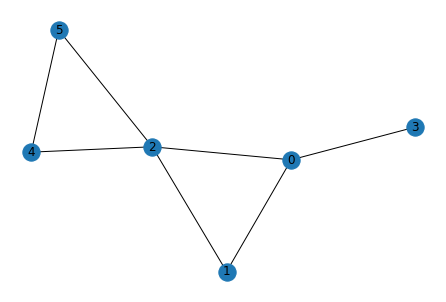

In [144]:
G= nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,4), (2,5), (4,5)])
nx.draw(G, with_labels=True)

In [145]:
order = sorted(list(G.nodes()))
order

[0, 1, 2, 3, 4, 5]

In [146]:
G.number_of_edges()

7

In [147]:
A = nx.to_numpy_matrix(G, nodelist=order)

In [148]:
A

matrix([[0., 1., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0.]])

In [149]:
I = np.eye(G.number_of_nodes())

In [150]:
I

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [151]:
A_own = A + I
A_own

matrix([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1.],
        [1., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 1.],
        [0., 0., 1., 0., 1., 1.]])

In [152]:
D_own = np.array(np.sum(A_own, axis=0))[0]
D_inv=D_own**(-.5)
D_inv = np.matrix(np.diag(D_inv))
D_inv

matrix([[0.5       , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.57735027, 0.        , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.4472136 , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.70710678, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.57735027,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.57735027]])

In [153]:
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W1

array([[-0.20633603,  0.88369678,  0.85310078, -0.33271647],
       [-0.50797253,  0.02707363,  0.98577156,  0.35008251],
       [-0.54559275,  0.6106041 ,  1.37026692, -0.22941536],
       [ 0.98139943,  1.57443369,  0.69478197,  0.53158286],
       [ 1.05377297, -2.58552321,  0.06561018,  0.67703962],
       [ 0.69709112,  0.33707908, -1.11218523,  1.64483937]])

In [154]:
W2 = np.random.normal(loc=0, size=(W1.shape[1], 2))
W2

array([[ 0.29937744, -0.95346368],
       [-0.3485587 ,  2.14120767],
       [ 0.80471207,  0.37878627],
       [-0.2748385 , -0.69065591]])

In [155]:
def gcn_layer(A, D, X, W):
    feature=D * A * D * X * W
    feature=np.maximum(0,feature)
    return feature

In [156]:
H1 = gcn_layer(A_own, D_inv, I, W1)

In [157]:
H1

matrix([[0.0267558 , 0.92192127, 1.04988645, 0.15452509],
        [0.        , 0.42178313, 0.9286609 , 0.        ],
        [0.16565653, 0.        , 0.44911312, 0.56961676],
        [0.41774891, 1.09965083, 0.64900766, 0.14815839],
        [0.44274992, 0.        , 0.00494305, 0.71472487],
        [0.44274992, 0.        , 0.00494305, 0.71472487]])

In [55]:
H2 = gcn_layer(A_own, D_inv, H1, W2)
H2

matrix([[0.04016574, 0.02001562],
        [0.        , 0.0210504 ],
        [0.08446047, 0.01909497],
        [0.09808897, 0.00515136],
        [0.14488406, 0.00454748],
        [0.14488406, 0.00454748]])

In [56]:
output=H2

In [57]:
feature_representations = {
    node: np.array(output)[node] 
    for node in G.nodes()}

In [58]:
feature_representations

{0: array([0.04016574, 0.02001562]),
 1: array([0.       , 0.0210504]),
 2: array([0.08446047, 0.01909497]),
 3: array([0.09808897, 0.00515136]),
 4: array([0.14488406, 0.00454748]),
 5: array([0.14488406, 0.00454748])}

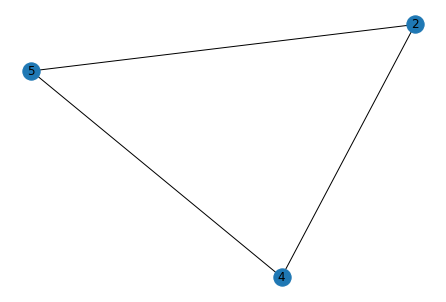

In [59]:
test= nx.Graph()
test.add_edges_from([(2,4), (2,5), (4,5)])
nx.draw(test, with_labels=True)

In [67]:
test_order = sorted(list(test.nodes()))
test_order

[2, 4, 5]

In [70]:
test_A = nx.to_numpy_matrix(test, nodelist=test_order)
test_A

matrix([[0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 0.]])

In [71]:
test_I = np.eye(test.number_of_nodes())
test_I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [72]:
test_A_own = test_A + test_I
test_A_own

matrix([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [73]:
test_D_own = np.array(np.sum(test_A_own, axis=0))[0]
test_D_inv=test_D_own**(-.5)
test_D_inv = np.matrix(np.diag(test_D_inv))
test_D_inv

matrix([[0.57735027, 0.        , 0.        ],
        [0.        , 0.57735027, 0.        ],
        [0.        , 0.        , 0.57735027]])

In [159]:
test_W1=np.empty((len(test_order),W1.shape[1]))
test_w1

array([[ 0.03192133,  0.70703867, -0.79486053, -0.51620209],
       [-0.2595944 , -0.16420365,  1.61585252,  0.52135619],
       [-0.75318081, -1.18461652, -0.19966279, -0.40107537]])

In [160]:
for i in range(len(test_order)):
    for j in range(W1.shape[1]):
        test_w1[i][j]=W1[test_order[i]][j]
test_w1

array([[-0.54559275,  0.6106041 ,  1.37026692, -0.22941536],
       [ 1.05377297, -2.58552321,  0.06561018,  0.67703962],
       [ 0.69709112,  0.33707908, -1.11218523,  1.64483937]])

In [161]:
test_H1= gcn_layer(test_A_own, test_D_inv, test_I, test_W1)
test_H1

matrix([[0.        , 0.        , 0.17148294, 0.01484078],
        [0.        , 0.        , 0.17148294, 0.01484078],
        [0.        , 0.        , 0.17148294, 0.01484078]])

In [164]:
test_W2=W2
test_W2

array([[ 0.29937744, -0.95346368],
       [-0.3485587 ,  2.14120767],
       [ 0.80471207,  0.37878627],
       [-0.2748385 , -0.69065591]])

In [165]:
test_H2 = gcn_layer(test_A_own, test_D_inv, test_H1, test_W2)
test_H2

matrix([[0.13391557, 0.05470551],
        [0.13391557, 0.05470551],
        [0.13391557, 0.05470551]])

In [172]:
similarity_matrix=test_H2*H2.T

In [173]:
actual_node = np.array(sorted(list(test.nodes())))
print(actual_node)
predicted_node=np.zeros(len(actual_node))
print(predicted_node)

[2 4 5]
[0. 0. 0.]


In [174]:
def maxelement(arr,p): 
    # get number of rows and columns 
    no_of_rows = len(arr) 
    no_of_column = len(arr[0]) 
    for i in range(no_of_rows):   
        # Initialize max1 to 0 at beginning 
        # of finding max element of each row 
        max1 = 0
        for j in range(no_of_column): 
            if arr[i][j] > max1 : 
                max1 = arr[i][j]
                p[i]=j
            #print(max1)
            #print(predicted_node[i])
    return p

In [176]:
predicted_node=maxelement(np.array(similarity_matrix),predicted_node )
print("actual node")
actual_node

actual node


array([2, 4, 5])

In [177]:
print("predicted node")
predicted_node

predicted node


array([4., 4., 4.])